In [1]:
import pandas as pd
import numpy as np

In [14]:
HCCdf = pd.read_csv('HCCcelltype_marker2.csv',index_col=0)
display(HCCdf.head())
print(HCCdf.shape)
print(set(HCCdf.celltype))
print(len(set(HCCdf.celltype)))

HCCFdf = pd.read_csv('hccf1f2celltype_marker2.csv',index_col=0)
display(HCCFdf.head())
print(HCCFdf.shape)
print(set(HCCFdf.celltype))
print(len(set(HCCFdf.celltype)))

,louvain,celltype
AAACCTGGTCGGGTCT-1,4,1 lymph 5 CD8TRM
AAAGCAAGTTCGAATC-1,0,2 lymph 1 NK2
AACCATGAGTAATCCC-1,9,2 lymph 1 NK2
AACCGCGAGCTCCTCT-1,4,1 lymph 1 TC
AACCGCGCACATGTGT-1,0,Unknown


(73589, 2)
{'2 lymph 1 NK2', '3 mye 6 DC3', '1 lymph 4 CD8', '7 Bipotent', '6 Hepa 3', '3 mye 2 macro S100A8', '5 endo FCN3', '3 mye 4 DC1', '3 mye 8 BC', '3 mye 3 TAM', '4 fibro', '1 lymph 3 Treg', '6 Hepa 1', '3 mye 5 DC2', '3 mye 1', '5 endo CD9', '2 lymph 1 NKC', '1 lymph 1 TC', '8 Mast', '6 Hepa', '5 endo', '5 endo TFF3', '2 lymph 1 NK1', '1 lymph 5 CD8TRM', 'Unknown', '5 endo PLVAP', '6 Hepa 2', '1 lymph 2 CD4', '3 mye 7 pDC'}
29


,louvain,celltype
AAACCTGGTCGGGTCT-1,1,1 lymph 5 CD8TRM
AAAGCAAGTTCGAATC-1,15,2 lymph 1 NK2
AACCATGAGTAATCCC-1,12,2 lymph 1 NK2
AACCGCGAGCTCCTCT-1,1,1 lymph 1 TC
AACCGCGCACATGTGT-1,0,Unknown


(105325, 2)
{'2 lymph 1 NK2', '3 mye 6 DC3', '1 lymph 4 CD8', '7 Bipotent', '6 Hepa 3', '3 mye 2 macro S100A8', '5 endo FCN3', '3 mye 4 DC1', '3 mye 8 BC', '3 mye 3 TAM', '4 fibro', '1 lymph 3 Treg', '6 Hepa 1', '3 mye 5 DC2', '3 mye 1', '5 endo CD9', '2 lymph 1 NKC', '1 lymph 1 TC', '8 Mast', '6 Hepa', '5 endo', '5 endo TFF3', '2 lymph 1 NK1', '1 lymph 5 CD8TRM', 'Unknown', '5 endo PLVAP', '6 Hepa 2', '1 lymph 2 CD4', '3 mye 7 pDC'}
29


In [3]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

cmap = matplotlib.cm.ocean.reversed()

def make_cmap(colors, position=None, bit=False):
    '''
    make_cmap takes a list of tuples which contain RGB values. The RGB
    values may either be in 8-bit [0 to 255] (in which bit must be set to
    True when called) or arithmetic [0 to 1] (default). make_cmap returns
    a cmap with equally spaced colors.
    Arrange your tuples so that the first color is the lowest value for the
    colorbar and the last is the highest.
    position contains values from 0 to 1 to dictate the location of each color.
    '''
    import matplotlib as mpl
    import numpy as np
    bit_rgb = np.linspace(0,1,256)
    if position == None:
        position = np.linspace(0,1,len(colors))
    else:
        if len(position) != len(colors):
            sys.exit("position length must be the same as colors")
        elif position[0] != 0 or position[-1] != 1:
            sys.exit("position must start with 0 and end with 1")
    if bit:
        for i in range(len(colors)):
            colors[i] = (bit_rgb[colors[i][0]],
                         bit_rgb[colors[i][1]],
                         bit_rgb[colors[i][2]])
    cdict = {'red':[], 'green':[], 'blue':[]}
    for pos, color in zip(position, colors):
        cdict['red'].append((pos, color[0], color[0]))
        cdict['green'].append((pos, color[1], color[1]))
        cdict['blue'].append((pos, color[2], color[2]))

    cmap = mpl.colors.LinearSegmentedColormap('my_colormap',cdict,256)
    return cmap

fig = plt.figure()
ax = fig.add_subplot(311)
### Create a list of RGB tuples
colors = [(239, 248, 249), (252, 78, 78),(96, 33, 104),(0,0,0)]  # This example uses the 8-bit RGB
### Call the function make_cmap which returns your colormap
my_cmap = make_cmap(colors, bit=True)
### Use your colormap
plt.pcolor(np.random.rand(25,50), cmap=my_cmap)
plt.colorbar()

def sns_heatmap(df,title,subtitle):
    mat = pd.DataFrame()

    for i in range(df.shape[1]):
        if i==df.shape[1]-1:
            break
        for j in range(df.shape[0]):
            a = []
            for k in range(df.shape[0]):
                if j == k:
                    a.append(df.iloc[j,i]*df.iloc[k,i+1])
                else :
                    a.append(0)
            mat[j]=a

    mat.columns = df.index
    mat.index = df.index

    mat = mat.rename_axis(df.columns[1])
    mat = mat.rename_axis(df.columns[0], axis="columns")

    f, ax = plt.subplots()
    sns.heatmap(mat,vmax=1500, vmin=-1, cmap=my_cmap)#
    plt.title(title, fontsize=20)
    plt.suptitle(subtitle, fontsize=12)

    ax.xaxis.set_tick_params(labelsize=8)
    ax.yaxis.set_tick_params(labelsize=8)



In [4]:
fig_size = plt.rcParams["figure.figsize"]
# Prints: [8.0, 6.0]
print ("Previous size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

print ("Current size:", fig_size)

Previous size: [6.0, 4.0]
Current size: [12, 10]


#   

#   

#   HCC

In [5]:
HCCdf['celltypes2'] = HCCdf.louvain.astype(str)
#HCCdf.celltypes2 = HCCdf.celltypes2.replace([''],'T cells')
HCCdf.celltypes2 = HCCdf.celltypes2.replace(['0','5','23'],'1 lymph 2 CD4')
HCCdf.celltypes2 = HCCdf.celltypes2.replace(['12'],'1 lymph 3 Treg')
HCCdf.celltypes2 = HCCdf.celltypes2.replace(['3','22'],'1 lymph 4 CD8')
HCCdf.celltypes2 = HCCdf.celltypes2.replace(['4'],'1 lymph 5 CD8TRM')
#HCCdf.celltypes2 = HCCdf.celltypes2.replace([''],'NK cells')
HCCdf.celltypes2 = HCCdf.celltypes2.replace(['1','15'],'2 lymph 2 NK1')
HCCdf.celltypes2 = HCCdf.celltypes2.replace(['9'],'2 lymph 3 NK2')
#HCCdf.celltypes2 = HCCdf.celltypes2.replace([''],'Myeloid')
HCCdf.celltypes2 = HCCdf.celltypes2.replace(['10'],'3 mye 2 TAM')
HCCdf.celltypes2 = HCCdf.celltypes2.replace(['8'],'3 mye 3 S100A8')
HCCdf.celltypes2 = HCCdf.celltypes2.replace(['19'],'3 mye 4 DC')
HCCdf.celltypes2 = HCCdf.celltypes2.replace(['18'],'3 mye 5 BC')
HCCdf.celltypes2 = HCCdf.celltypes2.replace(['13'],'4 fibro')
#HCCdf.celltypes2 = HCCdf.celltypes2.replace([''],'Endothelial')
HCCdf.celltypes2 = HCCdf.celltypes2.replace(['6'],'5 endo 2 CD9')
HCCdf.celltypes2 = HCCdf.celltypes2.replace(['26'],'5 endo 3 FCN3')
HCCdf.celltypes2 = HCCdf.celltypes2.replace(['2','17'],'5 endo 4 PLVAP')
HCCdf.celltypes2 = HCCdf.celltypes2.replace(['27'],'5 endo 5 TFF3')
#HCCdf.celltypes2 = HCCdf.celltypes2.replace([''],'Hepatocytes')
HCCdf.celltypes2 = HCCdf.celltypes2.replace(['7'],'6 Hepa 1')
HCCdf.celltypes2 = HCCdf.celltypes2.replace(['11','21'],'6 Hepa 2')
HCCdf.celltypes2 = HCCdf.celltypes2.replace(['14','25'],'6 Hepa 3')
HCCdf.celltypes2 = HCCdf.celltypes2.replace(['20','16'],'6 Hepa 4')
HCCdf.celltypes2 = HCCdf.celltypes2.replace(['24'],'7 Bipotent')
HCCdf.celltypes2 = HCCdf.celltypes2.replace(['28'],'8 Mast')

HCCdf['numbered_louvain'] = HCCdf.celltypes2

In [6]:
HCCdf['numbered_Garnett'] = HCCdf.celltype

HCCdf.numbered_Garnett = HCCdf.numbered_Garnett.replace(['3 mye 3 TAM'],'3 mye 2 TAM')
HCCdf.numbered_Garnett = HCCdf.numbered_Garnett.replace(['3 mye 2 macro S100A8'],'3 mye 3 S100A8')

numbered_Garnett,1 lymph 1 TC,1 lymph 2 CD4,1 lymph 3 Treg,1 lymph 4 CD8,1 lymph 5 CD8TRM,2 lymph 1 NK1,2 lymph 1 NK2,2 lymph 1 NKC,3 mye 1,3 mye 2 TAM,...,5 endo FCN3,5 endo PLVAP,5 endo TFF3,6 Hepa,6 Hepa 1,6 Hepa 2,6 Hepa 3,7 Bipotent,8 Mast,Unknown
numbered_louvain,,,,,,,,,,,,,,,,,,,,,
1 lymph 2 CD4,3838,5033,381,268,62,101,912,566,78,210,...,0,1,0,29,4,31,17,196,16,1960
1 lymph 3 Treg,957,326,330,149,3,12,106,96,48,92,...,0,0,0,1,0,1,0,23,0,476
1 lymph 4 CD8,1542,372,182,797,82,84,479,421,61,130,...,0,0,0,4,1,1,4,85,5,862
1 lymph 5 CD8TRM,1591,232,110,182,426,59,350,136,69,242,...,0,0,0,0,0,0,0,58,4,722
2 lymph 2 NK1,968,419,566,189,791,1307,470,2386,40,66,...,4,6,3,0,0,3,3,128,364,1428


Text(0.5, 1.0, '\nHCC cell type agnostic correlation\n')

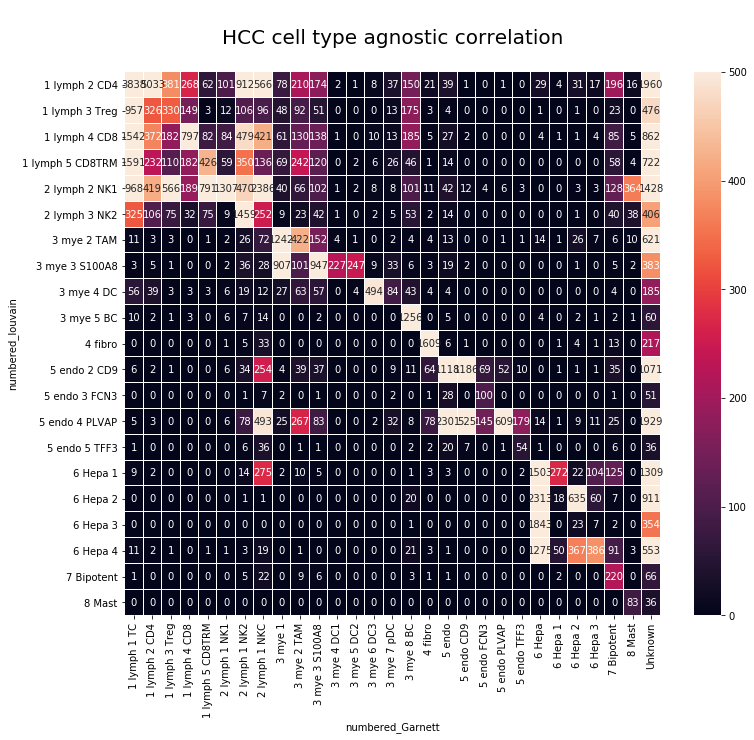

In [7]:
HCCdf1 = HCCdf.groupby(['numbered_louvain','numbered_Garnett']).size().unstack().fillna(0).round(0).astype(int)
display(HCCdf1.head())

sns.heatmap(HCCdf1, annot=True, vmax = 500, fmt="d", linewidths=.01)#, linewidths=.009)#cmap="YlGnBu", 
plt.title('\nHCC cell type agnostic correlation\n', fontsize=20)

Text(0.5, 1.0, '\nHCC cell type agnostic correlation\n')

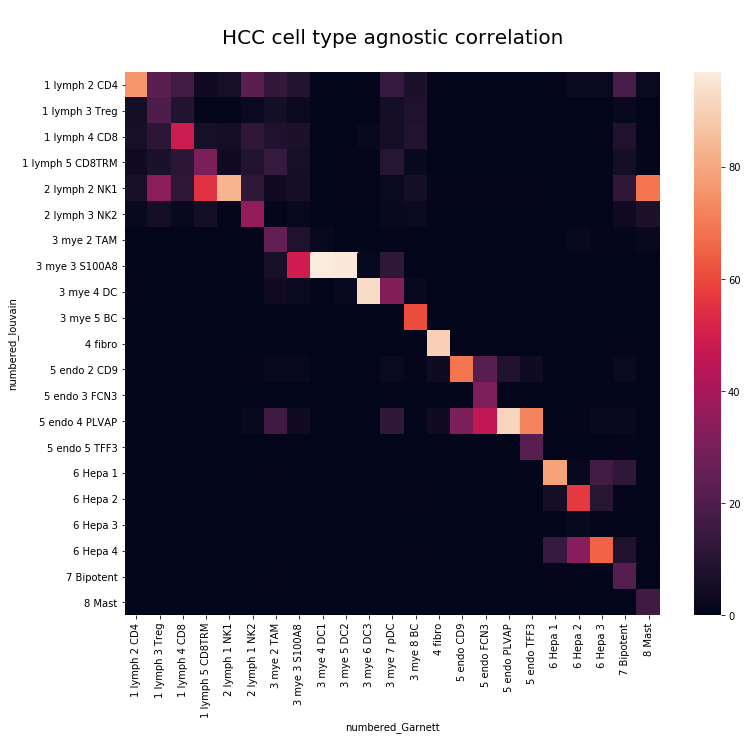

In [10]:
#HCCdf2 = HCCdf1.drop(['1 lymph 1 TC','2 lymph 1 NKC','3 mye 1','5 endo','6 Hepa', 'Unknown'], axis=0)#,'2 lymph 1 NKC'
HCCdf2 = HCCdf2.apply(lambda x : x/sum(x)*100).round(0).astype(int)

sns.heatmap(HCCdf2)#, linewidths=.009)#cmap="YlGnBu", vmax = 500,, annot=True, fmt="d", linewidths=.01
plt.title('\nHCC cell type agnostic correlation\n', fontsize=20)

Previous size: [12.0, 10.0]
Current size: [12, 10]


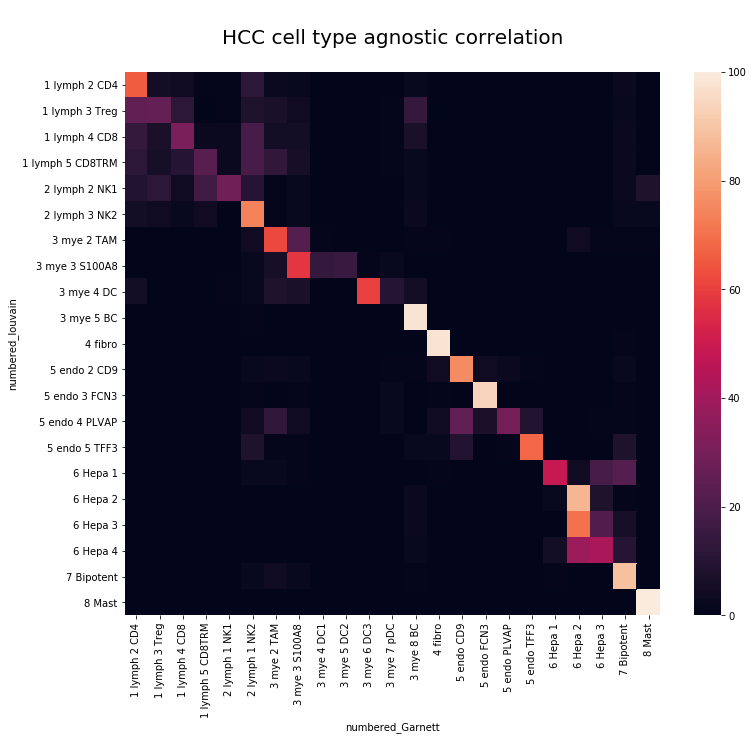

In [9]:
fig_size = plt.rcParams["figure.figsize"]
# Prints: [8.0, 6.0]
print ("Previous size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

print ("Current size:", fig_size)

HCCdf2 = HCCdf1.drop(['1 lymph 1 TC','2 lymph 1 NKC','3 mye 1','5 endo','6 Hepa', 'Unknown'], axis=1)#
#HCCdf2 = HCCdf2.drop(['1 lymph STMN1'], axis=0)

HCCdf2 = HCCdf2.apply(lambda x : x/sum(x)*100,1).round(0).astype(int)

sns_plot = sns.heatmap(HCCdf2)#, cmap="YlGnBu", linewidths=.009)#, vmax = 500,, annot=True, fmt="d", linewidths=.01
plt.title('\nHCC cell type agnostic correlation\n', fontsize=20)

fig = sns_plot.get_figure()
fig.savefig('./finalfig/HCC.png') 

#  

#   

# HCC F

In [15]:
HCCFdf['numbered_louvain'] = HCCFdf.louvain.astype(str)

HCCFdf.numbered_louvain = HCCFdf.numbered_louvain.replace(['0','14','15','16'], '1 lymph 2 CD4')
HCCFdf.numbered_louvain = HCCFdf.numbered_louvain.replace(['17'], '1 lymph 3 Treg')
HCCFdf.numbered_louvain = HCCFdf.numbered_louvain.replace(['1'], '1 lymph 4 CD8')

HCCFdf.numbered_louvain = HCCFdf.numbered_louvain.replace(['3'], '1 lymph 5 NK 3')
HCCFdf.numbered_louvain = HCCFdf.numbered_louvain.replace(['12'], '1 lymph 6 NK 12')

HCCFdf.numbered_louvain = HCCFdf.numbered_louvain.replace(['5'], '2 mye 1 macro')
#HCCFdf.numbered_louvain = HCCFdf.numbered_louvain.replace(['25'], '2 mye 3 DC')
HCCFdf.numbered_louvain = HCCFdf.numbered_louvain.replace(['25'], '2 mye 4 Fetal DC')
HCCFdf.numbered_louvain = HCCFdf.numbered_louvain.replace(['21'], '2 mye 5 BC')
HCCFdf.numbered_louvain = HCCFdf.numbered_louvain.replace(['9'], '2 mye 6 Fetal BC')
HCCFdf.numbered_louvain = HCCFdf.numbered_louvain.replace(['22', '27'], '2 mye 2 Fetal ')
#HCCFdf.numbered_louvain = HCCFdf.numbered_louvain.replace([], '2 mye 2 F27')

HCCFdf.numbered_louvain = HCCFdf.numbered_louvain.replace(['19'], '3 Fibro')
HCCFdf.numbered_louvain = HCCFdf.numbered_louvain.replace(['23'], '3 Fibro F')

HCCFdf.numbered_louvain = HCCFdf.numbered_louvain.replace(['2'], '4 Endo 2')
HCCFdf.numbered_louvain = HCCFdf.numbered_louvain.replace(['8'], '4 Endo 8')
HCCFdf.numbered_louvain = HCCFdf.numbered_louvain.replace(['10'], '4 Endo F')

HCCFdf.numbered_louvain = HCCFdf.numbered_louvain.replace(['11'], '5 Hep 11')
HCCFdf.numbered_louvain = HCCFdf.numbered_louvain.replace(['13'], '5 Hep 13')
HCCFdf.numbered_louvain = HCCFdf.numbered_louvain.replace(['18'], '5 Hep 18')
HCCFdf.numbered_louvain = HCCFdf.numbered_louvain.replace(['20'], '5 Hep 20')
HCCFdf.numbered_louvain = HCCFdf.numbered_louvain.replace(['24'], '5 Hep 24')
HCCFdf.numbered_louvain = HCCFdf.numbered_louvain.replace(['28'], '5 Hep F')
HCCFdf.numbered_louvain = HCCFdf.numbered_louvain.replace(['29'], '6 Bipotent')

HCCFdf.numbered_louvain = HCCFdf.numbered_louvain.replace(['30'], '8 Mast')

HCCFdf.numbered_louvain = HCCFdf.numbered_louvain.replace(['4','6','7'], '7 Fetal Erythroid')

HCCFdf.numbered_louvain = HCCFdf.numbered_louvain.replace(['26'], '7 Fetal Megakaryocytes')

In [16]:
HCCFdf['numbered_Garnett'] = HCCFdf.celltype

In [13]:
HCCFdf['numbered_Garnett'] = HCCFdf.celltype

HCCFdf.numbered_Garnett = HCCFdf.numbered_Garnett.replace(['T cells'],'1 lymph 1 TC')
HCCFdf.numbered_Garnett = HCCFdf.numbered_Garnett.replace(['Naive CD4'],'1 lymph 2 CD4')
HCCFdf.numbered_Garnett = HCCFdf.numbered_Garnett.replace(['Treg'],'1 lymph 3 Treg')
HCCFdf.numbered_Garnett = HCCFdf.numbered_Garnett.replace(['CD8'],'1 lymph 4 CD8')
HCCFdf.numbered_Garnett = HCCFdf.numbered_Garnett.replace(['CD8TRM'],'1 lymph 4 CD8TRM')
HCCFdf.numbered_Garnett = HCCFdf.numbered_Garnett.replace(['NK cells'],'1 lymph 5 NKC')
HCCFdf.numbered_Garnett = HCCFdf.numbered_Garnett.replace(['NK1'],'1 lymph 5 NK1')
HCCFdf.numbered_Garnett = HCCFdf.numbered_Garnett.replace(['NK2'],'1 lymph 5 NK2')

HCCFdf.numbered_Garnett = HCCFdf.numbered_Garnett.replace(['Myeloid'],'2 mye')
HCCFdf.numbered_Garnett = HCCFdf.numbered_Garnett.replace(['Macro_1'],'2 mye 1 macro1')
HCCFdf.numbered_Garnett = HCCFdf.numbered_Garnett.replace(['Macro_2'],'2 mye 1 macro2')
HCCFdf.numbered_Garnett = HCCFdf.numbered_Garnett.replace(['DC1'],'2 mye 2 DC1')
HCCFdf.numbered_Garnett = HCCFdf.numbered_Garnett.replace(['DC2'],'2 mye 2 DC2')
HCCFdf.numbered_Garnett = HCCFdf.numbered_Garnett.replace(['DC3'],'2 mye 2 DC3')
HCCFdf.numbered_Garnett = HCCFdf.numbered_Garnett.replace(['pDC'],'2 mye 2 pDC')
HCCFdf.numbered_Garnett = HCCFdf.numbered_Garnett.replace(['B cells'],'2 mye 3 BC')

HCCFdf.numbered_Garnett = HCCFdf.numbered_Garnett.replace(['Mast'],'7 Mast')

HCCFdf.numbered_Garnett = HCCFdf.numbered_Garnett.replace(['Fibroblast'],'3 fibro')
HCCFdf.numbered_Garnett = HCCFdf.numbered_Garnett.replace(['Endothelial'],'4 endo')
HCCFdf.numbered_Garnett = HCCFdf.numbered_Garnett.replace(['CD9 endo'],'4 endo CD9')
HCCFdf.numbered_Garnett = HCCFdf.numbered_Garnett.replace(['FCN3 endo'],'4 endo FCN3')
HCCFdf.numbered_Garnett = HCCFdf.numbered_Garnett.replace(['PLVAP endo'],'4 endo PLVAP')
HCCFdf.numbered_Garnett = HCCFdf.numbered_Garnett.replace(['TFF3 endo'],'4 endo TFF3')

HCCFdf.numbered_Garnett = HCCFdf.numbered_Garnett.replace(['Hepatocytes'],'5 Hepa')
HCCFdf.numbered_Garnett = HCCFdf.numbered_Garnett.replace(['HEP_1'],'5 Hepa 1')
HCCFdf.numbered_Garnett = HCCFdf.numbered_Garnett.replace(['HEP_2'],'5 Hepa 2')
HCCFdf.numbered_Garnett = HCCFdf.numbered_Garnett.replace(['HEP_3'],'5 Hepa 3')
HCCFdf.numbered_Garnett = HCCFdf.numbered_Garnett.replace(['Bipotent'],'6 Bipotent')

HCCFdf.numbered_Garnett = HCCFdf.numbered_Garnett.replace(['Unknown'],'8 Unknown')

In [24]:
HCCFdf1.head()

numbered_Garnett,1 lymph 1 TC,1 lymph 2 CD4,1 lymph 3 Treg,1 lymph 4 CD8,1 lymph 5 CD8TRM,2 lymph 1 NK1,2 lymph 1 NK2,2 lymph 1 NKC,3 mye 1,3 mye 2 macro S100A8,...,5 endo FCN3,5 endo PLVAP,5 endo TFF3,6 Hepa,6 Hepa 1,6 Hepa 2,6 Hepa 3,7 Bipotent,8 Mast,Unknown
numbered_louvain,,,,,,,,,,,,,,,,,,,,,
1 lymph 2 CD4,4788,4845,472,733,137,179,1288,854,68,230,...,0,0,0,23,2,18,16,300,8,2589
1 lymph 3 Treg,810,175,297,74,5,10,60,74,14,37,...,0,0,0,2,0,2,2,21,1,389
1 lymph 4 CD8,3073,683,295,560,552,119,598,413,89,198,...,0,0,0,2,0,2,2,133,0,1669
1 lymph 5 NK 3,922,296,794,236,712,939,196,2409,15,55,...,0,0,0,0,0,1,1,141,31,947
1 lymph 6 NK 12,429,76,126,95,69,15,1654,303,7,22,...,0,0,0,0,0,0,0,57,3,388


Previous size: [12.0, 10.0]
Current size: [12, 10]


numbered_Garnett,1 lymph 2 CD4,1 lymph 3 Treg,1 lymph 4 CD8,1 lymph 5 CD8TRM,2 lymph 1 NK1,2 lymph 1 NK2,3 mye 2 macro S100A8,3 mye 3 TAM,3 mye 4 DC1,3 mye 5 DC2,...,4 fibro,5 endo CD9,5 endo FCN3,5 endo PLVAP,5 endo TFF3,6 Hepa 1,6 Hepa 2,6 Hepa 3,7 Bipotent,8 Mast
numbered_louvain,,,,,,,,,,,,,,,,,,,,,
1 lymph 2 CD4,4845,472,733,137,179,1288,230,160,1,3,...,32,0,0,0,0,2,18,16,300,8
1 lymph 3 Treg,175,297,74,5,10,60,37,38,0,1,...,1,0,0,0,0,0,2,2,21,1
1 lymph 4 CD8,683,295,560,552,119,598,198,192,0,0,...,11,0,0,0,0,0,2,2,133,0
1 lymph 5 NK 3,296,794,236,712,939,196,55,22,1,1,...,5,1,0,0,0,0,1,1,141,31
1 lymph 6 NK 12,76,126,95,69,15,1654,22,22,0,0,...,4,2,0,0,0,0,0,0,57,3


numbered_Garnett,1 lymph 2 CD4,1 lymph 3 Treg,1 lymph 4 CD8,1 lymph 5 CD8TRM,2 lymph 1 NK1,2 lymph 1 NK2,3 mye 2 macro S100A8,3 mye 3 TAM,3 mye 4 DC1,3 mye 5 DC2,...,4 fibro,5 endo CD9,5 endo FCN3,5 endo PLVAP,5 endo TFF3,6 Hepa 1,6 Hepa 2,6 Hepa 3,7 Bipotent,8 Mast
numbered_louvain,,,,,,,,,,,,,,,,,,,,,
1 lymph 2 CD4,55,5,8,2,2,15,3,2,0,0,...,0,0,0,0,0,0,0,0,3,0
1 lymph 3 Treg,18,31,8,1,1,6,4,4,0,0,...,0,0,0,0,0,0,0,0,2,0
1 lymph 4 CD8,19,8,16,16,3,17,6,5,0,0,...,0,0,0,0,0,0,0,0,4,0
1 lymph 5 NK 3,8,22,7,20,26,6,2,1,0,0,...,0,0,0,0,0,0,0,0,4,1
1 lymph 6 NK 12,3,6,4,3,1,75,1,1,0,0,...,0,0,0,0,0,0,0,0,3,0


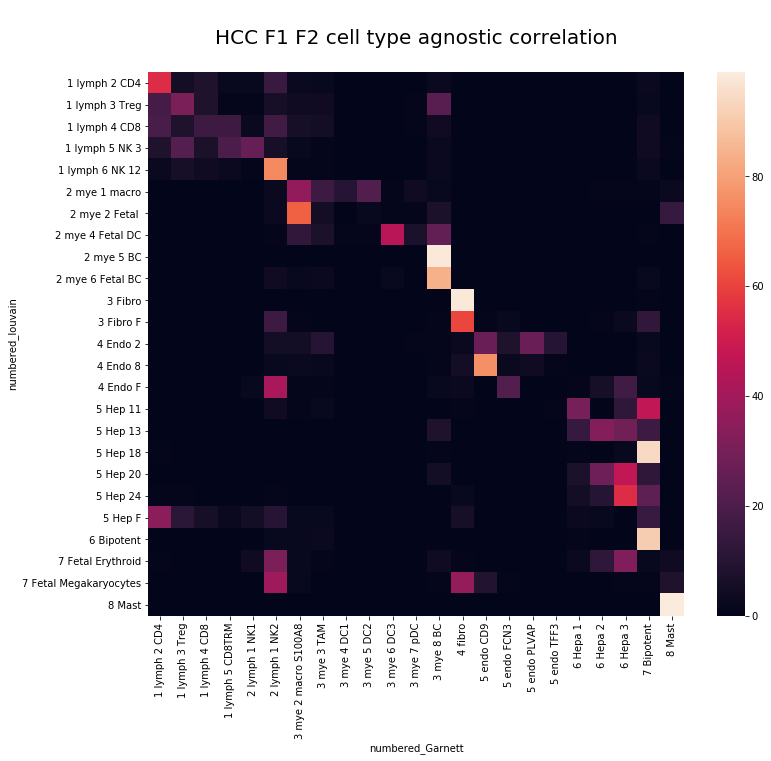

In [27]:
fig_size = plt.rcParams["figure.figsize"]
# Prints: [8.0, 6.0]
print ("Previous size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

print ("Current size:", fig_size)

HCCFdf1 = HCCFdf.groupby(['numbered_louvain','numbered_Garnett']).size().unstack().fillna(0).round(0).astype(int)
HCCFdf1 = HCCFdf1.drop(['1 lymph 1 TC','2 lymph 1 NKC','3 mye 1','5 endo','6 Hepa', 'Unknown'], axis=1)#
display(HCCFdf1.head())
#sns.heatmap(HCCFdf1, annot=True, vmax=500, fmt="d", cmap="YlGnBu", linewidths=.01)#, vmin = 100

HCCFdf1 = HCCFdf1.apply(lambda x : x/sum(x)*100, axis=1).round(0).astype(int)
display(HCCFdf1.head())

sns_plot = sns.heatmap(HCCFdf1)#, linewidths=.009)# ,cmap="YlGnBu",vmax = 500,, annot=True, fmt="d", linewidths=.01
plt.title('\nHCC F1 F2 cell type agnostic correlation\n', fontsize=20)

fig = sns_plot.get_figure()
fig.savefig('./finalfig/HCCF1F2.png') 

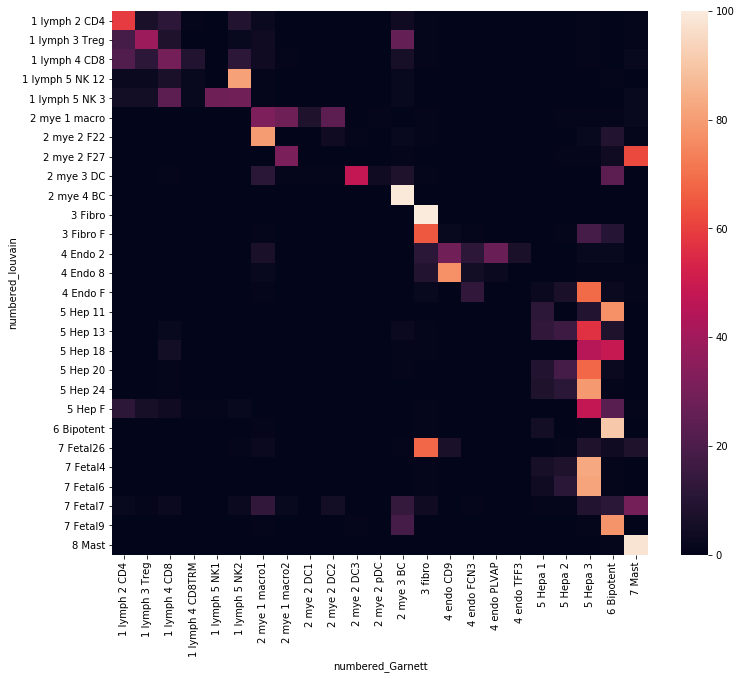

In [18]:
sns_plot = sns.heatmap(HCCFdf1)#, vmin = 100
fig = sns_plot.get_figure()
fig.savefig('HCCF1F2.png') 